In [138]:
pip install Faker

In [139]:
import pandas as pd
import numpy as np
from faker import Faker
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# تحديد عدد السجلات
num_samples = 25000
faker = Faker()

# توليد بيانات افتراضية
data1 = {
    'request_time': [faker.date_time_this_year() for _ in range(num_samples)],
    'current_floor': np.random.randint(1, 31, num_samples),  # مبنى من 30 طابقًا
    'destination_floor': np.random.randint(1, 31, num_samples),
    'num_passengers': np.random.randint(1, 6, num_samples),  # من 1 إلى 5 ركاب
    'waiting_time': np.random.uniform(5, 60, num_samples),  # زمن انتظار بين 5 إلى 60 ثانية
    'travel_time': np.random.uniform(10, 120, num_samples),  # زمن الرحلة بين 10 إلى 120 ثانية
    'direction': np.random.choice(['Up', 'Down'], num_samples),
    'load_status': np.random.choice(['Light', 'Medium', 'Full'], num_samples),
    'request_type': np.random.choice(['Internal', 'External'], num_samples),
    'peak_hours': np.random.choice([True, False], num_samples, p=[0.3, 0.7]),  # وقت الذروة 30%
    'elevator_id': np.random.choice(['A', 'B', 'C','D','E'], num_samples),  # رقم تعريف المصعد
    'passenger_weight': np.random.uniform(50, 120, num_samples)  # وزن الراكب
}

# إنشاء DataFrame
data = pd.DataFrame(data1)

# التأكد من أن الطابق المطلوب مختلف عن الطابق الحالي
data = data[data['current_floor'] != data['destination_floor']].reset_index(drop=True)

# إضافة أعمدة زمنية
data['request_day_of_week'] = data['request_time'].dt.day_name()
data['request_hour'] = data['request_time'].dt.hour


# إضافة عمود استهلاك الطاقة
data['energy_consumption_kwh'] = data['travel_time'] * data['num_passengers'] * 0.001

# إضافة عمود انتظار الناس
data['waiting_people'] = np.random.randint(1, 10, len(data))


# عرض أول 5 سجلات
print(data.head())

# حفظ البيانات إلى ملف CSV
data.to_csv("elevator_data.csv", index=False)



                request_time  current_floor  destination_floor  \
0 2025-03-10 02:59:20.220526              8                 25   
1 2025-03-12 21:51:17.857309              1                 20   
2 2025-01-13 21:05:18.501533             27                 24   
3 2025-01-02 08:01:32.881302             27                 11   
4 2025-01-24 15:54:03.963595             29                  4   

   num_passengers  waiting_time  travel_time direction load_status  \
0               5     45.944184    49.647130        Up       Light   
1               4     58.174238    24.342175        Up        Full   
2               1     48.726397   116.768848        Up      Medium   
3               3     31.326164    70.884008        Up      Medium   
4               4     42.915855    30.126099        Up       Light   

  request_type  peak_hours elevator_id  passenger_weight request_day_of_week  \
0     Internal        True           D        109.912784              Monday   
1     Internal       F

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24221 entries, 0 to 24220
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   request_time            24221 non-null  datetime64[ns]
 1   current_floor           24221 non-null  int64         
 2   destination_floor       24221 non-null  int64         
 3   num_passengers          24221 non-null  int64         
 4   waiting_time            24221 non-null  float64       
 5   travel_time             24221 non-null  float64       
 6   direction               24221 non-null  object        
 7   load_status             24221 non-null  object        
 8   request_type            24221 non-null  object        
 9   peak_hours              24221 non-null  bool          
 10  elevator_id             24221 non-null  object        
 11  passenger_weight        24221 non-null  float64       
 12  request_day_of_week     24221 non-null  object

In [141]:
data.describe()

,request_time,current_floor,destination_floor,num_passengers,waiting_time,travel_time,passenger_weight,request_hour,energy_consumption_kwh,waiting_people
count,24221,24221.000000,24221.000000,24221.000000,24221.000000,24221.000000,24221.000000,24221.000000,24221.000000,24221.000000
mean,2025-02-06 09:22:06.849481216,15.437719,15.519384,3.007927,32.524775,65.077550,84.803314,11.497667,0.195351,5.007266
min,2025-01-01 00:03:00.810536,1.000000,1.000000,1.000000,5.001614,10.006438,50.001750,0.000000,0.010006,1.000000
25%,2025-01-19 00:18:11.429118976,8.000000,8.000000,2.000000,18.911342,37.410533,67.137231,6.000000,0.083149,3.000000
50%,2025-02-06 07:30:11.620717056,15.000000,16.000000,3.000000,32.440728,65.137587,84.748757,12.000000,0.161209,5.000000
75%,2025-02-24 17:40:03.451578880,23.000000,23.000000,4.000000,46.287185,92.635374,102.381090,18.000000,0.282970,7.000000
max,2025-03-15 01:26:10.990463,30.000000,30.000000,5.000000,59.998082,119.999219,119.994912,23.000000,0.599976,9.000000
std,NaN,8.679202,8.612979,1.409571,15.854459,31.810691,20.292736,6.919262,0.139348,2.567622


In [142]:

# معالجة القيم المفقودة
missing_data = data.isnull().sum()
print(missing_data)

# ملء القيم المفقودة
numeric_data = data.select_dtypes(include=np.number)
numeric_data.fillna(numeric_data.mean(), inplace=True)
data[numeric_data.columns] = numeric_data
data.fillna(data.mode().iloc[0], inplace=True)

request_time              0
current_floor             0
destination_floor         0
num_passengers            0
waiting_time              0
travel_time               0
direction                 0
load_status               0
request_type              0
peak_hours                0
elevator_id               0
passenger_weight          0
request_day_of_week       0
request_hour              0
energy_consumption_kwh    0
waiting_people            0
dtype: int64


In [143]:

print(data.head())
# تحويل الأعمدة الزمنية
data['request_day_of_week'] = data['request_day_of_week'].map({
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
})
data['request_time_minutes'] = data['request_time'].apply(lambda x: x.hour * 60 + x.minute)


                request_time  current_floor  destination_floor  \
0 2025-03-10 02:59:20.220526              8                 25   
1 2025-03-12 21:51:17.857309              1                 20   
2 2025-01-13 21:05:18.501533             27                 24   
3 2025-01-02 08:01:32.881302             27                 11   
4 2025-01-24 15:54:03.963595             29                  4   

   num_passengers  waiting_time  travel_time direction load_status  \
0               5     45.944184    49.647130        Up       Light   
1               4     58.174238    24.342175        Up        Full   
2               1     48.726397   116.768848        Up      Medium   
3               3     31.326164    70.884008        Up      Medium   
4               4     42.915855    30.126099        Up       Light   

  request_type  peak_hours elevator_id  passenger_weight request_day_of_week  \
0     Internal        True           D        109.912784              Monday   
1     Internal       F

In [144]:
print(data['request_day_of_week'])

0        0
1        2
2        0
3        3
4        4
        ..
24216    6
24217    2
24218    3
24219    5
24220    5
Name: request_day_of_week, Length: 24221, dtype: int64


In [145]:

# الترميز
label_encoder = LabelEncoder()
data['direction'] = label_encoder.fit_transform(data['direction'])
data['load_status'] = label_encoder.fit_transform(data['load_status'])
data['request_type'] = label_encoder.fit_transform(data['request_type'])
data['elevator_id'] = label_encoder.fit_transform(data['elevator_id'])
data['peak_hours'] = label_encoder.fit_transform(data['peak_hours'])







In [146]:

# اكتشاف القيم المتطرفة
Q1 = data['passenger_weight'].quantile(0.25)
Q3 = data['passenger_weight'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['passenger_weight'] >= lower_bound) & (data['passenger_weight'] <= upper_bound)]



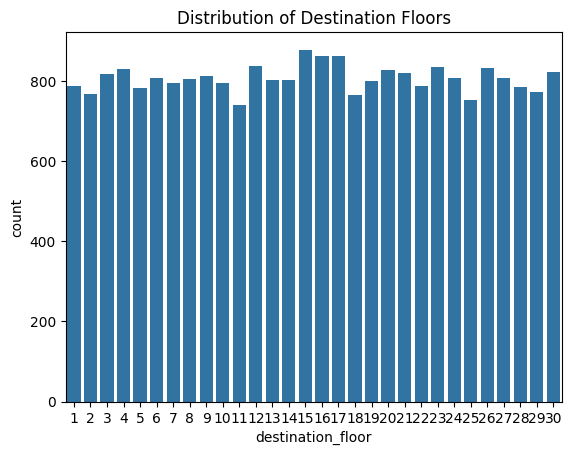

In [147]:

# التحليل الاستكشافي
sns.countplot(x='destination_floor', data=data)
plt.title("Distribution of Destination Floors")
plt.show()


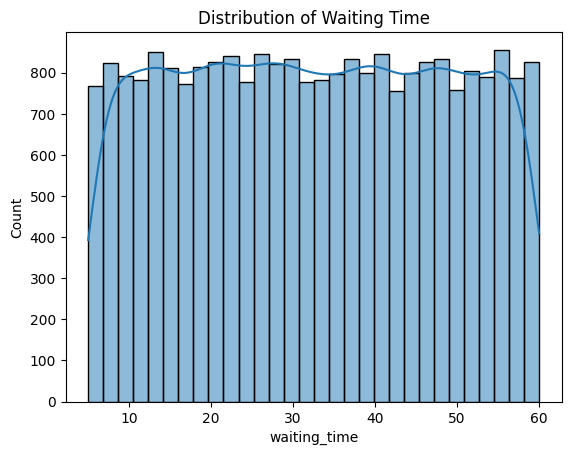

In [148]:

sns.histplot(data['waiting_time'], kde=True)
plt.title("Distribution of Waiting Time")
plt.show()


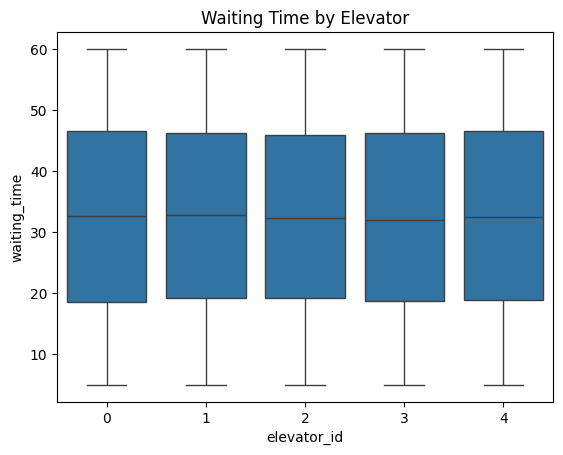

In [149]:

sns.boxplot(x='elevator_id', y='waiting_time', data=data)
plt.title("Waiting Time by Elevator")
plt.show()


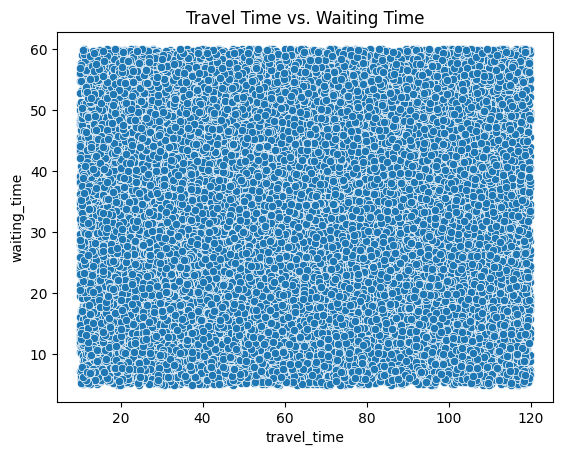

In [150]:

sns.scatterplot(x='travel_time', y='waiting_time', data=data)
plt.title("Travel Time vs. Waiting Time")
plt.show()

In [151]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


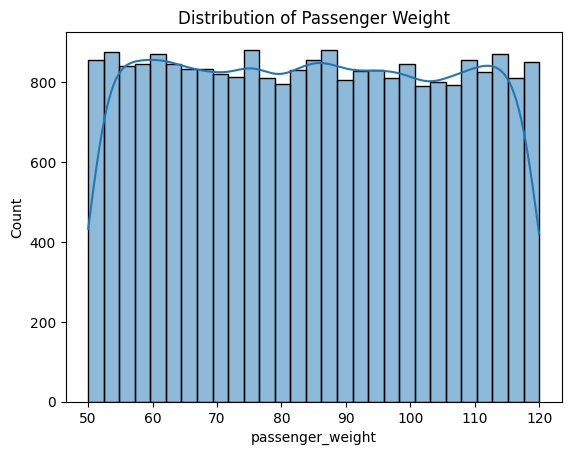

In [152]:

# التحليل الاستكشافي
sns.histplot(data['passenger_weight'], kde=True)
plt.title("Distribution of Passenger Weight")
plt.show()


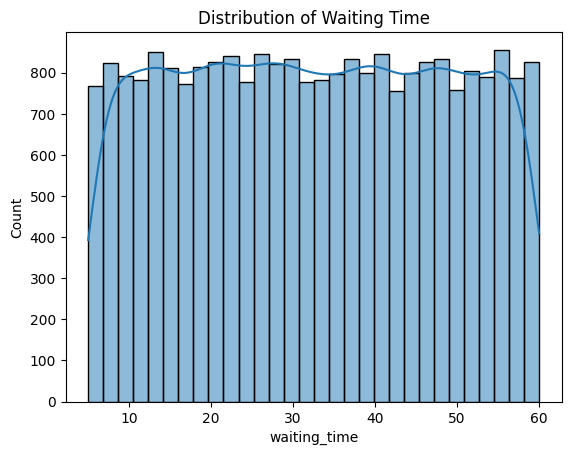

In [153]:

sns.histplot(data['waiting_time'], kde=True)
plt.title("Distribution of Waiting Time")
plt.show()

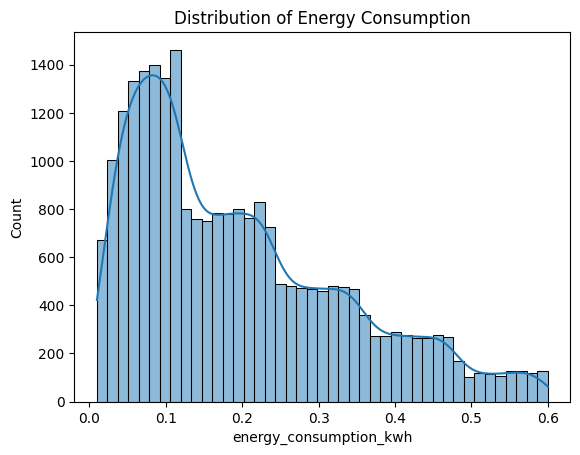

In [154]:

sns.histplot(data['energy_consumption_kwh'], kde=True)
plt.title("Distribution of Energy Consumption")
plt.show()

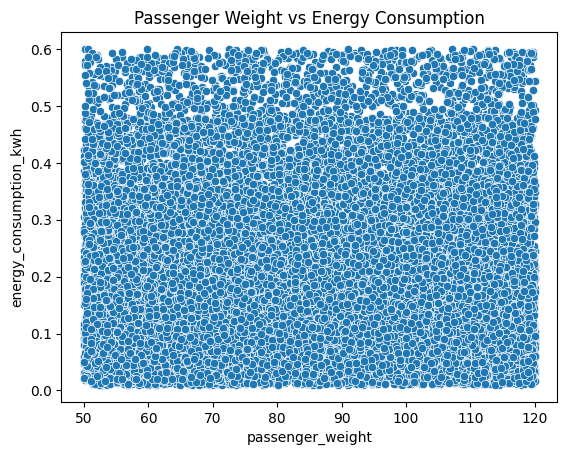

In [155]:

sns.scatterplot(x=data['passenger_weight'], y=data['energy_consumption_kwh'])
plt.title("Passenger Weight vs Energy Consumption")
plt.show()

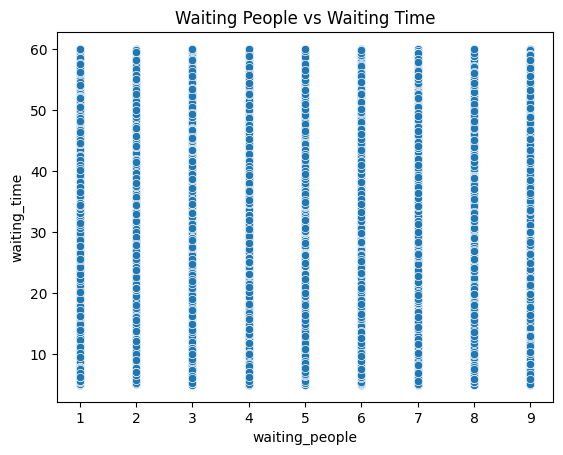

In [156]:

sns.scatterplot(x=data['waiting_people'], y=data['waiting_time'])
plt.title("Waiting People vs Waiting Time")
plt.show()

In [157]:

# تطبيع الأعمدة العددية
scaler_minmax = MinMaxScaler()
data[['passenger_weight', 'waiting_time', 'energy_consumption_kwh']] = scaler_minmax.fit_transform(data[['passenger_weight', 'waiting_time', 'energy_consumption_kwh']])


In [158]:
data.head(10)

,request_time,current_floor,destination_floor,num_passengers,waiting_time,travel_time,direction,load_status,request_type,peak_hours,elevator_id,passenger_weight,request_day_of_week,request_hour,energy_consumption_kwh,waiting_people,request_time_minutes
0,2025-03-10 02:59:20.220526,8,25,5,0.744458,49.647130,1,1,1,1,3,0.855956,0,2,0.403799,3,179
1,2025-03-12 21:51:17.857309,1,20,4,0.966837,24.342175,1,0,1,0,4,0.383061,2,21,0.148079,8,1311
2,2025-01-13 21:05:18.501533,27,24,1,0.795047,116.768848,1,2,1,0,0,0.628110,0,21,0.180963,5,1265
3,2025-01-02 08:01:32.881302,27,11,3,0.478659,70.884008,1,2,0,0,2,0.478098,3,8,0.343485,3,481
4,2025-01-24 15:54:03.963595,29,4,4,0.689394,30.126099,1,1,0,0,4,0.863958,4,15,0.187294,9,954
5,2025-02-15 08:54:23.734026,2,6,4,0.007738,95.152464,1,2,0,0,4,0.281743,5,8,0.628174,8,534
6,2025-03-10 14:53:07.994240,13,23,1,0.103740,111.034177,0,1,0,0,4,0.158261,0,14,0.171242,1,893
7,2025-03-11 19:48:19.630125,20,18,3,0.022586,52.999977,0,0,1,0,3,0.180624,1,19,0.252545,3,1188
8,2025-01-06 08:03:16.850371,4,18,2,0.614537,108.602554,0,1,1,0,3,0.892316,0,8,0.351202,2,483
9,2025-03-07 10:23:49.747121,14,2,3,0.385853,109.374254,1,0,1,0,2,0.825855,4,10,0.539208,8,623


                                       MSE        R2
Linear Regression                 0.083086 -0.001507
Polynomial Regression (degree=2)  0.083554 -0.007148
Ridge Regression (alpha=1.0)      0.083085 -0.001504
Lasso Regression (alpha=1.0)      0.082963 -0.000030


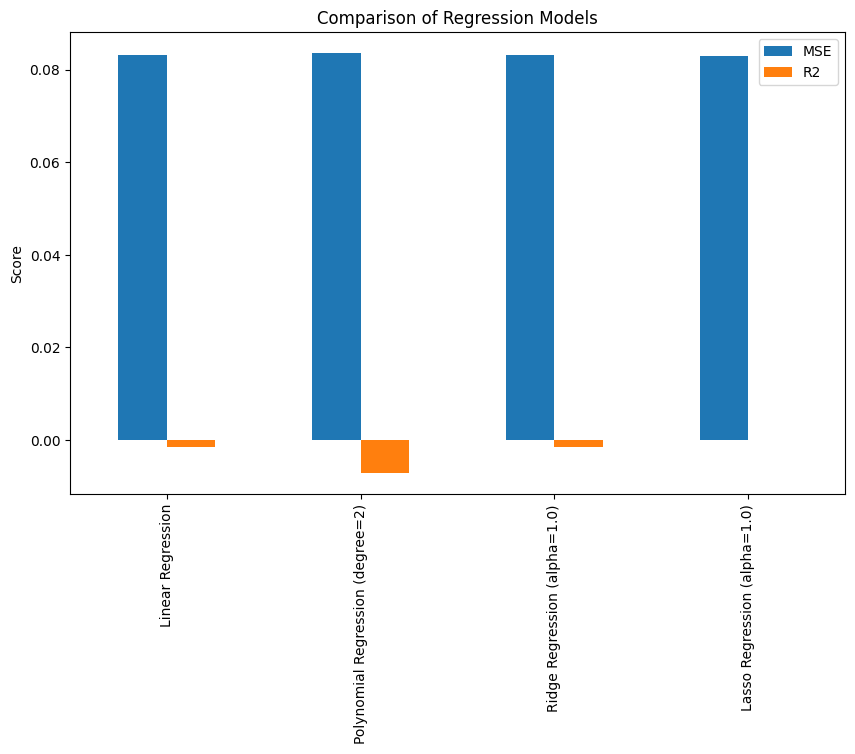

In [159]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# تقسيم البيانات وتدريب النماذج
X = data.drop(columns=['waiting_time', 'request_time', 'request_day_of_week'])
y = data['waiting_time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# نماذج الانحدار
models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression (degree=2)": (PolynomialFeatures(degree=2), LinearRegression()),
    "Ridge Regression (alpha=1.0)": Ridge(alpha=1.0),
    "Lasso Regression (alpha=1.0)": Lasso(alpha=1.0)
}

results = {}

for name, model in models.items():
    if isinstance(model, tuple):  # Polynomial Regression
        poly, lin_reg = model
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        lin_reg.fit(X_train_poly, y_train)
        y_pred = lin_reg.predict(X_test_poly)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}

# 5. تقييم النماذج
results_df = pd.DataFrame(results).T
print(results_df)

# 6. تصور النتائج
results_df.plot(kind="bar", figsize=(10, 6))
plt.title("Comparison of Regression Models")
plt.ylabel("Score")
plt.show()

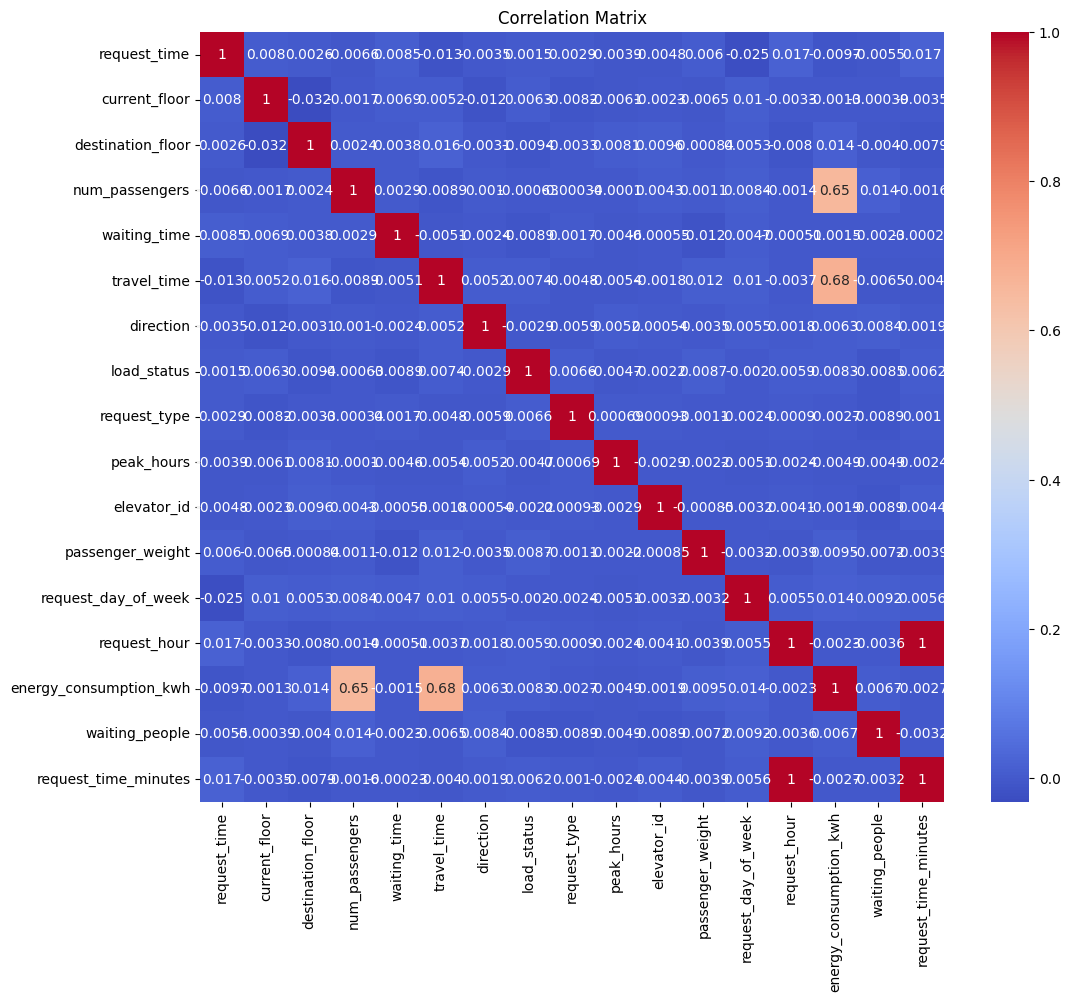

In [160]:
#  تحليل البيانات بشكل أعمق
# تحليل الارتباطات
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
X = data.drop(columns=['request_time_minutes'])

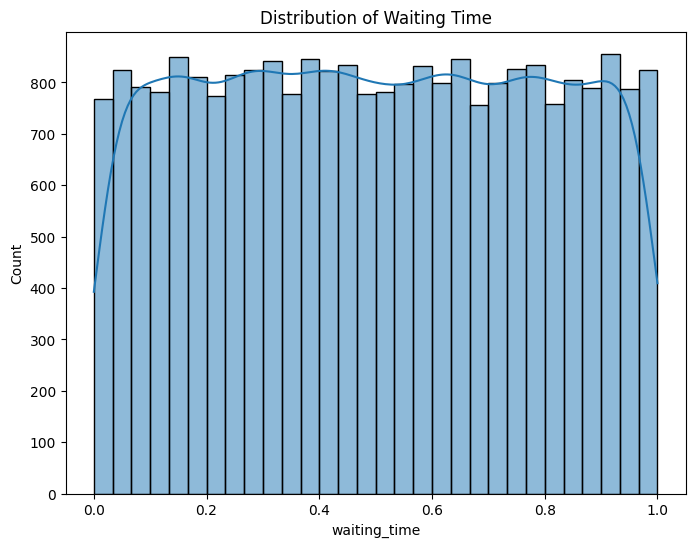

In [161]:

# توزيع المتغير الهدف
plt.figure(figsize=(8, 6))
sns.histplot(data['waiting_time'], kde=True)
plt.title("Distribution of Waiting Time")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers

#  نماذج الانحدار المتقدمة
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(),
    "Neural Network": keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
}

results = {}

for name, model in models.items():
    if name == "Neural Network":
        model.compile(optimizer='adam', loss='mse')
        model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
        y_pred = model.predict(X_test).flatten()
    else:
        #  ضبط المعلمات الفائقة والتحقق المتقاطع
        param_grid = {}
        if name == "Random Forest":
            param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
        elif name == "Gradient Boosting":
            param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
        elif name == "SVR":
            param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}

# تقييم النماذج
results_df = pd.DataFrame(results).T
print(results_df)

# 9. تصور النتائج
results_df.plot(kind="bar", figsize=(10, 6))
plt.title("Comparison of Regression Models")
plt.ylabel("Score")
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
